In [ ]:
! pip install -U git+https://github.com/albu/albumentations --no-cache-dir
! pip install torchsummary

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dataset import Cifar10SearchDataset, UnNormalize
from utils import get_stats, get_train_loader, get_test_loader, get_summary, get_device
from augment import get_train_transform, get_test_transform
from model import depthwise_separable_conv, Net, train_model

In [10]:
from torch.optim.lr_scheduler import StepLR, OneCycleLR
import torch.nn as nn
import torch.optim as optim

In [3]:
trainloader = get_train_loader(transform=None)

Files already downloaded and verified


In [4]:
mean, std = get_stats(trainloader)

[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: (50000, 32, 32, 3)
 - min: 0
 - max: 255

Dataset Mean - [0.49139968 0.48215841 0.44653091]
Dataset Std - [0.24703223 0.24348513 0.26158784] 


In [5]:
denorm = UnNormalize(mean, std) 

In [6]:

##### Double check

train_transform = get_train_transform(mean, std)
test_transform = get_test_transform(mean, std)

In [7]:
trainloader = get_train_loader(transform=train_transform)
testloader = get_test_loader(transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 frog  ship horse plane


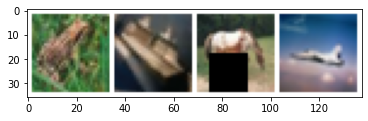

In [ ]:
'''classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image
def imshow(img):
    img = denorm(img)    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))'''

In [8]:
device = get_device()

CUDA Available? True


In [9]:
model = Net().to(device)
get_summary(model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]             288
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 32, 34, 34]           1,024
       BatchNorm2d-8           [-1, 32, 34, 34]              64
              ReLU-9           [-1, 32, 34, 34]               0
depthwise_separable_conv-10           [-1, 32, 34, 34]               0
           Conv2d-11           [-1, 32, 34, 34]             288
      BatchNorm2d-12           [-1, 32, 34, 34]              64
             ReLU-13           [-1, 32, 34, 34]               0
           Conv2d-14           [

In [12]:
criterion = nn.CrossEntropyLoss()

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.8)
scheduler = OneCycleLR(optimizer, max_lr=0.05, epochs=300, steps_per_epoch=len(trainloader))

EPOCHS = 300


In [ ]:
results = train_model(model, criterion, device, trainloader, testloader, optimizer, scheduler, EPOCHS)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.129937171936035 Batch_id=390 Accuracy=15.05: 100%|██████████| 391/391 [00:23<00:00, 16.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 2027/10000 (20.27%)

EPOCH: 1


Loss=1.8041889667510986 Batch_id=390 Accuracy=25.80: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0143, Accuracy: 3198/10000 (31.98%)

EPOCH: 2


Loss=1.8056061267852783 Batch_id=390 Accuracy=33.90: 100%|██████████| 391/391 [00:22<00:00, 17.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0123, Accuracy: 4243/10000 (42.43%)

EPOCH: 3


Loss=1.5768786668777466 Batch_id=390 Accuracy=38.64: 100%|██████████| 391/391 [00:22<00:00, 17.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 4606/10000 (46.06%)

EPOCH: 4


Loss=1.8218063116073608 Batch_id=390 Accuracy=41.50: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 5028/10000 (50.28%)

EPOCH: 5


Loss=1.7667582035064697 Batch_id=390 Accuracy=43.93: 100%|██████████| 391/391 [00:22<00:00, 17.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 5192/10000 (51.92%)

EPOCH: 6


Loss=1.326839804649353 Batch_id=390 Accuracy=46.41: 100%|██████████| 391/391 [00:22<00:00, 17.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 5565/10000 (55.65%)

EPOCH: 7


Loss=1.3655096292495728 Batch_id=390 Accuracy=48.12: 100%|██████████| 391/391 [00:22<00:00, 17.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 5413/10000 (54.13%)

EPOCH: 8


Loss=1.382616639137268 Batch_id=390 Accuracy=49.60: 100%|██████████| 391/391 [00:22<00:00, 17.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 5609/10000 (56.09%)

EPOCH: 9


Loss=1.264453649520874 Batch_id=390 Accuracy=50.47: 100%|██████████| 391/391 [00:22<00:00, 17.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 5567/10000 (55.67%)

EPOCH: 10


Loss=1.2808101177215576 Batch_id=390 Accuracy=51.48: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 5934/10000 (59.34%)

EPOCH: 11


Loss=1.417704701423645 Batch_id=390 Accuracy=52.47: 100%|██████████| 391/391 [00:22<00:00, 17.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 6140/10000 (61.40%)

EPOCH: 12


Loss=1.2259231805801392 Batch_id=390 Accuracy=53.86: 100%|██████████| 391/391 [00:22<00:00, 17.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6088/10000 (60.88%)

EPOCH: 13


Loss=1.2038906812667847 Batch_id=390 Accuracy=54.66: 100%|██████████| 391/391 [00:22<00:00, 17.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6337/10000 (63.37%)

EPOCH: 14


Loss=1.3786554336547852 Batch_id=390 Accuracy=55.49: 100%|██████████| 391/391 [00:22<00:00, 17.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 6337/10000 (63.37%)

EPOCH: 15


Loss=1.186552882194519 Batch_id=390 Accuracy=56.40: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6557/10000 (65.57%)

EPOCH: 16


Loss=1.1927156448364258 Batch_id=390 Accuracy=56.96: 100%|██████████| 391/391 [00:22<00:00, 17.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 6464/10000 (64.64%)

EPOCH: 17


Loss=1.1518285274505615 Batch_id=390 Accuracy=57.86: 100%|██████████| 391/391 [00:22<00:00, 17.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6677/10000 (66.77%)

EPOCH: 18


Loss=1.2170937061309814 Batch_id=390 Accuracy=58.86: 100%|██████████| 391/391 [00:22<00:00, 17.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6735/10000 (67.35%)

EPOCH: 19


Loss=0.9580082893371582 Batch_id=390 Accuracy=59.36: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6834/10000 (68.34%)

EPOCH: 20


Loss=1.040108561515808 Batch_id=390 Accuracy=59.31: 100%|██████████| 391/391 [00:22<00:00, 17.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 6779/10000 (67.79%)

EPOCH: 21


Loss=1.2525213956832886 Batch_id=390 Accuracy=60.17: 100%|██████████| 391/391 [00:22<00:00, 17.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6894/10000 (68.94%)

EPOCH: 22


Loss=0.9982072114944458 Batch_id=390 Accuracy=60.98: 100%|██████████| 391/391 [00:22<00:00, 17.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 6939/10000 (69.39%)

EPOCH: 23


Loss=0.8722883462905884 Batch_id=390 Accuracy=61.46: 100%|██████████| 391/391 [00:22<00:00, 17.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7055/10000 (70.55%)

EPOCH: 24


Loss=1.1369820833206177 Batch_id=390 Accuracy=61.99: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7028/10000 (70.28%)

EPOCH: 25


Loss=1.0774229764938354 Batch_id=390 Accuracy=62.16: 100%|██████████| 391/391 [00:22<00:00, 17.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7071/10000 (70.71%)

EPOCH: 26


Loss=1.0670632123947144 Batch_id=390 Accuracy=62.46: 100%|██████████| 391/391 [00:22<00:00, 17.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7164/10000 (71.64%)

EPOCH: 27


Loss=1.1522352695465088 Batch_id=390 Accuracy=63.20: 100%|██████████| 391/391 [00:22<00:00, 17.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7174/10000 (71.74%)

EPOCH: 28


Loss=0.986384391784668 Batch_id=390 Accuracy=63.73: 100%|██████████| 391/391 [00:22<00:00, 17.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7203/10000 (72.03%)

EPOCH: 29


Loss=0.8082176446914673 Batch_id=390 Accuracy=64.04: 100%|██████████| 391/391 [00:22<00:00, 17.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7252/10000 (72.52%)

EPOCH: 30


Loss=0.7484915256500244 Batch_id=390 Accuracy=63.90: 100%|██████████| 391/391 [00:22<00:00, 17.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7216/10000 (72.16%)

EPOCH: 31


Loss=1.0977362394332886 Batch_id=390 Accuracy=64.25: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7384/10000 (73.84%)

EPOCH: 32


Loss=0.9427188634872437 Batch_id=390 Accuracy=64.50: 100%|██████████| 391/391 [00:22<00:00, 17.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7358/10000 (73.58%)

EPOCH: 33


Loss=0.9520595669746399 Batch_id=390 Accuracy=65.15: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7447/10000 (74.47%)

EPOCH: 34


Loss=0.8715358972549438 Batch_id=390 Accuracy=65.41: 100%|██████████| 391/391 [00:22<00:00, 17.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7524/10000 (75.24%)

EPOCH: 35


Loss=1.1615256071090698 Batch_id=390 Accuracy=65.68: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7377/10000 (73.77%)

EPOCH: 36


Loss=0.9560284614562988 Batch_id=390 Accuracy=65.69: 100%|██████████| 391/391 [00:22<00:00, 17.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7475/10000 (74.75%)

EPOCH: 37


Loss=1.1970614194869995 Batch_id=390 Accuracy=66.06: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7507/10000 (75.07%)

EPOCH: 38


Loss=0.8351277112960815 Batch_id=390 Accuracy=66.46: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7486/10000 (74.86%)

EPOCH: 39


Loss=1.2443069219589233 Batch_id=390 Accuracy=66.56: 100%|██████████| 391/391 [00:22<00:00, 17.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7507/10000 (75.07%)

EPOCH: 40


Loss=1.1173990964889526 Batch_id=390 Accuracy=66.99: 100%|██████████| 391/391 [00:22<00:00, 17.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7662/10000 (76.62%)

EPOCH: 41


Loss=0.9021841883659363 Batch_id=390 Accuracy=67.40: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7628/10000 (76.28%)

EPOCH: 42


Loss=0.9212607145309448 Batch_id=390 Accuracy=67.63: 100%|██████████| 391/391 [00:22<00:00, 17.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7627/10000 (76.27%)

EPOCH: 43


Loss=0.9692758321762085 Batch_id=390 Accuracy=67.65: 100%|██████████| 391/391 [00:22<00:00, 17.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7630/10000 (76.30%)

EPOCH: 44


Loss=0.8345543146133423 Batch_id=390 Accuracy=67.88: 100%|██████████| 391/391 [00:22<00:00, 17.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7652/10000 (76.52%)

EPOCH: 45


Loss=0.8116574287414551 Batch_id=390 Accuracy=68.00: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7588/10000 (75.88%)

EPOCH: 46


Loss=0.8020154237747192 Batch_id=390 Accuracy=67.71: 100%|██████████| 391/391 [00:22<00:00, 17.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7717/10000 (77.17%)

EPOCH: 47


Loss=1.1688722372055054 Batch_id=390 Accuracy=68.01: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7649/10000 (76.49%)

EPOCH: 48


Loss=1.004082202911377 Batch_id=390 Accuracy=68.26: 100%|██████████| 391/391 [00:22<00:00, 17.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7680/10000 (76.80%)

EPOCH: 49


Loss=0.745945394039154 Batch_id=390 Accuracy=68.39: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7776/10000 (77.76%)

EPOCH: 50


Loss=0.9394775629043579 Batch_id=390 Accuracy=68.26: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7746/10000 (77.46%)

EPOCH: 51


Loss=0.9508839845657349 Batch_id=390 Accuracy=69.02: 100%|██████████| 391/391 [00:22<00:00, 17.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7693/10000 (76.93%)

EPOCH: 52


Loss=0.9734589457511902 Batch_id=390 Accuracy=69.26: 100%|██████████| 391/391 [00:22<00:00, 17.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7707/10000 (77.07%)

EPOCH: 53


Loss=0.9757164716720581 Batch_id=390 Accuracy=69.56: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7809/10000 (78.09%)

EPOCH: 54


Loss=0.7452734708786011 Batch_id=390 Accuracy=69.44: 100%|██████████| 391/391 [00:22<00:00, 17.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7808/10000 (78.08%)

EPOCH: 55


Loss=0.8239395022392273 Batch_id=390 Accuracy=69.46: 100%|██████████| 391/391 [00:22<00:00, 17.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7747/10000 (77.47%)

EPOCH: 56


Loss=0.8976567983627319 Batch_id=390 Accuracy=69.53: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7890/10000 (78.90%)

EPOCH: 57


Loss=1.2112287282943726 Batch_id=390 Accuracy=69.57: 100%|██████████| 391/391 [00:22<00:00, 17.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7771/10000 (77.71%)

EPOCH: 58


Loss=0.8998981714248657 Batch_id=390 Accuracy=69.80: 100%|██████████| 391/391 [00:22<00:00, 17.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7821/10000 (78.21%)

EPOCH: 59


Loss=0.8313220143318176 Batch_id=390 Accuracy=70.15: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7891/10000 (78.91%)

EPOCH: 60


Loss=0.7311443090438843 Batch_id=390 Accuracy=70.18: 100%|██████████| 391/391 [00:22<00:00, 17.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7888/10000 (78.88%)

EPOCH: 61


Loss=1.0795910358428955 Batch_id=390 Accuracy=70.45: 100%|██████████| 391/391 [00:22<00:00, 17.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7849/10000 (78.49%)

EPOCH: 62


Loss=0.9499160051345825 Batch_id=390 Accuracy=70.37: 100%|██████████| 391/391 [00:22<00:00, 17.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7903/10000 (79.03%)

EPOCH: 63


Loss=0.8359469175338745 Batch_id=390 Accuracy=70.47: 100%|██████████| 391/391 [00:22<00:00, 17.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7907/10000 (79.07%)

EPOCH: 64


Loss=0.7699834704399109 Batch_id=390 Accuracy=70.85: 100%|██████████| 391/391 [00:22<00:00, 17.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7877/10000 (78.77%)

EPOCH: 65


Loss=0.9471219778060913 Batch_id=390 Accuracy=70.67: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7929/10000 (79.29%)

EPOCH: 66


Loss=0.7126981019973755 Batch_id=390 Accuracy=70.82: 100%|██████████| 391/391 [00:22<00:00, 17.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 7993/10000 (79.93%)

EPOCH: 67


Loss=0.9285820722579956 Batch_id=390 Accuracy=70.92: 100%|██████████| 391/391 [00:22<00:00, 17.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7937/10000 (79.37%)

EPOCH: 68


Loss=0.9657691121101379 Batch_id=390 Accuracy=71.14: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 7979/10000 (79.79%)

EPOCH: 69


Loss=0.6905693411827087 Batch_id=390 Accuracy=71.05: 100%|██████████| 391/391 [00:22<00:00, 17.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 7991/10000 (79.91%)

EPOCH: 70


Loss=0.8018129467964172 Batch_id=390 Accuracy=71.30: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8015/10000 (80.15%)

EPOCH: 71


Loss=0.768875777721405 Batch_id=390 Accuracy=71.56: 100%|██████████| 391/391 [00:23<00:00, 16.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8000/10000 (80.00%)

EPOCH: 72


Loss=1.0769081115722656 Batch_id=390 Accuracy=71.47: 100%|██████████| 391/391 [00:23<00:00, 16.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7938/10000 (79.38%)

EPOCH: 73


Loss=0.7746753692626953 Batch_id=390 Accuracy=71.42: 100%|██████████| 391/391 [00:22<00:00, 17.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8031/10000 (80.31%)

EPOCH: 74


Loss=0.5879179835319519 Batch_id=390 Accuracy=71.64: 100%|██████████| 391/391 [00:22<00:00, 17.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 7996/10000 (79.96%)

EPOCH: 75


Loss=0.8477072715759277 Batch_id=390 Accuracy=72.01: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8029/10000 (80.29%)

EPOCH: 76


Loss=0.7868500351905823 Batch_id=390 Accuracy=72.10: 100%|██████████| 391/391 [00:22<00:00, 17.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8023/10000 (80.23%)

EPOCH: 77


Loss=0.8116146922111511 Batch_id=390 Accuracy=71.85: 100%|██████████| 391/391 [00:23<00:00, 16.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7952/10000 (79.52%)

EPOCH: 78


Loss=0.759267270565033 Batch_id=390 Accuracy=72.07: 100%|██████████| 391/391 [00:23<00:00, 17.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8031/10000 (80.31%)

EPOCH: 79


Loss=0.7373439073562622 Batch_id=390 Accuracy=72.33: 100%|██████████| 391/391 [00:23<00:00, 16.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8030/10000 (80.30%)

EPOCH: 80


Loss=0.9108208417892456 Batch_id=390 Accuracy=72.36: 100%|██████████| 391/391 [00:23<00:00, 16.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8037/10000 (80.37%)

EPOCH: 81


Loss=0.8251680135726929 Batch_id=390 Accuracy=72.49: 100%|██████████| 391/391 [00:23<00:00, 16.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8093/10000 (80.93%)

EPOCH: 82


Loss=0.7164011597633362 Batch_id=390 Accuracy=72.31: 100%|██████████| 391/391 [00:23<00:00, 16.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8092/10000 (80.92%)

EPOCH: 83


Loss=0.7484629154205322 Batch_id=390 Accuracy=72.84: 100%|██████████| 391/391 [00:23<00:00, 16.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8059/10000 (80.59%)

EPOCH: 84


Loss=0.8466070890426636 Batch_id=390 Accuracy=72.77: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8067/10000 (80.67%)

EPOCH: 85


Loss=0.7010874152183533 Batch_id=390 Accuracy=72.80: 100%|██████████| 391/391 [00:23<00:00, 16.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8059/10000 (80.59%)

EPOCH: 86


Loss=0.6019719839096069 Batch_id=390 Accuracy=72.53: 100%|██████████| 391/391 [00:23<00:00, 16.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8074/10000 (80.74%)

EPOCH: 87


Loss=0.7912918329238892 Batch_id=390 Accuracy=72.92: 100%|██████████| 391/391 [00:23<00:00, 16.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8083/10000 (80.83%)

EPOCH: 88


Loss=0.7839096188545227 Batch_id=390 Accuracy=73.15: 100%|██████████| 391/391 [00:23<00:00, 16.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8040/10000 (80.40%)

EPOCH: 89


Loss=0.8668949007987976 Batch_id=390 Accuracy=73.00: 100%|██████████| 391/391 [00:23<00:00, 16.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8087/10000 (80.87%)

EPOCH: 90


Loss=0.7421169281005859 Batch_id=390 Accuracy=73.07: 100%|██████████| 391/391 [00:23<00:00, 16.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8097/10000 (80.97%)

EPOCH: 91


Loss=0.9079383015632629 Batch_id=390 Accuracy=73.36: 100%|██████████| 391/391 [00:23<00:00, 16.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8123/10000 (81.23%)

EPOCH: 92


Loss=0.8005566596984863 Batch_id=390 Accuracy=73.12: 100%|██████████| 391/391 [00:23<00:00, 16.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8099/10000 (80.99%)

EPOCH: 93


Loss=0.8472806215286255 Batch_id=390 Accuracy=73.26: 100%|██████████| 391/391 [00:23<00:00, 16.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8032/10000 (80.32%)

EPOCH: 94


Loss=0.9004019498825073 Batch_id=390 Accuracy=73.39: 100%|██████████| 391/391 [00:23<00:00, 16.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8156/10000 (81.56%)

EPOCH: 95


Loss=0.8049429655075073 Batch_id=390 Accuracy=73.53: 100%|██████████| 391/391 [00:23<00:00, 16.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8138/10000 (81.38%)

EPOCH: 96


Loss=0.733314037322998 Batch_id=390 Accuracy=73.57: 100%|██████████| 391/391 [00:23<00:00, 16.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8108/10000 (81.08%)

EPOCH: 97


Loss=1.0184779167175293 Batch_id=390 Accuracy=73.70: 100%|██████████| 391/391 [00:22<00:00, 17.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8101/10000 (81.01%)

EPOCH: 98


Loss=0.5156224370002747 Batch_id=390 Accuracy=73.89: 100%|██████████| 391/391 [00:23<00:00, 16.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8170/10000 (81.70%)

EPOCH: 99


Loss=0.677997887134552 Batch_id=390 Accuracy=73.66: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8105/10000 (81.05%)

EPOCH: 100


Loss=0.6362346410751343 Batch_id=390 Accuracy=73.92: 100%|██████████| 391/391 [00:23<00:00, 16.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8207/10000 (82.07%)

EPOCH: 101


Loss=0.9174734950065613 Batch_id=390 Accuracy=74.18: 100%|██████████| 391/391 [00:23<00:00, 16.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8137/10000 (81.37%)

EPOCH: 102


Loss=0.6204922795295715 Batch_id=390 Accuracy=73.94: 100%|██████████| 391/391 [00:23<00:00, 16.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8199/10000 (81.99%)

EPOCH: 103


Loss=0.8656309247016907 Batch_id=390 Accuracy=74.04: 100%|██████████| 391/391 [00:22<00:00, 17.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8194/10000 (81.94%)

EPOCH: 104


Loss=0.7303668260574341 Batch_id=390 Accuracy=74.06: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8130/10000 (81.30%)

EPOCH: 105


Loss=0.8286480903625488 Batch_id=390 Accuracy=74.44: 100%|██████████| 391/391 [00:23<00:00, 16.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8240/10000 (82.40%)

EPOCH: 106


Loss=0.6955767273902893 Batch_id=390 Accuracy=74.29: 100%|██████████| 391/391 [00:23<00:00, 16.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8227/10000 (82.27%)

EPOCH: 107


Loss=0.9667830467224121 Batch_id=390 Accuracy=74.07: 100%|██████████| 391/391 [00:23<00:00, 16.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8163/10000 (81.63%)

EPOCH: 108


Loss=0.7976807355880737 Batch_id=390 Accuracy=74.07: 100%|██████████| 391/391 [00:23<00:00, 16.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8226/10000 (82.26%)

EPOCH: 109


Loss=0.7511911392211914 Batch_id=390 Accuracy=74.36: 100%|██████████| 391/391 [00:23<00:00, 16.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8289/10000 (82.89%)

EPOCH: 110


Loss=0.7357107996940613 Batch_id=390 Accuracy=74.45: 100%|██████████| 391/391 [00:22<00:00, 17.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8195/10000 (81.95%)

EPOCH: 111


Loss=0.4656309187412262 Batch_id=390 Accuracy=74.59: 100%|██████████| 391/391 [00:23<00:00, 16.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8244/10000 (82.44%)

EPOCH: 112


Loss=0.6979600787162781 Batch_id=390 Accuracy=74.79: 100%|██████████| 391/391 [00:23<00:00, 16.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8115/10000 (81.15%)

EPOCH: 113


Loss=0.7117346525192261 Batch_id=390 Accuracy=74.52: 100%|██████████| 391/391 [00:23<00:00, 16.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8205/10000 (82.05%)

EPOCH: 114


Loss=0.8445817232131958 Batch_id=390 Accuracy=74.60: 100%|██████████| 391/391 [00:23<00:00, 16.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8149/10000 (81.49%)

EPOCH: 115


Loss=0.7263607382774353 Batch_id=390 Accuracy=74.80: 100%|██████████| 391/391 [00:23<00:00, 16.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8248/10000 (82.48%)

EPOCH: 116


Loss=1.0175812244415283 Batch_id=390 Accuracy=74.77: 100%|██████████| 391/391 [00:23<00:00, 16.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8233/10000 (82.33%)

EPOCH: 117


Loss=0.5845562219619751 Batch_id=390 Accuracy=74.91: 100%|██████████| 391/391 [00:23<00:00, 16.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8251/10000 (82.51%)

EPOCH: 118


Loss=0.6638013124465942 Batch_id=390 Accuracy=74.95: 100%|██████████| 391/391 [00:23<00:00, 16.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8270/10000 (82.70%)

EPOCH: 119


Loss=0.771309494972229 Batch_id=390 Accuracy=74.85: 100%|██████████| 391/391 [00:23<00:00, 16.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8294/10000 (82.94%)

EPOCH: 120


Loss=0.662258505821228 Batch_id=390 Accuracy=75.15: 100%|██████████| 391/391 [00:23<00:00, 16.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8279/10000 (82.79%)

EPOCH: 121


Loss=1.0035383701324463 Batch_id=390 Accuracy=74.86: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8273/10000 (82.73%)

EPOCH: 122


Loss=1.006892204284668 Batch_id=390 Accuracy=75.12: 100%|██████████| 391/391 [00:23<00:00, 16.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8246/10000 (82.46%)

EPOCH: 123


Loss=0.9156244993209839 Batch_id=390 Accuracy=75.16: 100%|██████████| 391/391 [00:23<00:00, 16.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8285/10000 (82.85%)

EPOCH: 124


Loss=0.583565354347229 Batch_id=390 Accuracy=75.02: 100%|██████████| 391/391 [00:23<00:00, 16.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8285/10000 (82.85%)

EPOCH: 125


Loss=0.6372243165969849 Batch_id=390 Accuracy=75.57: 100%|██████████| 391/391 [00:23<00:00, 16.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8277/10000 (82.77%)

EPOCH: 126


Loss=0.7098592519760132 Batch_id=390 Accuracy=75.32: 100%|██████████| 391/391 [00:23<00:00, 16.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8219/10000 (82.19%)

EPOCH: 127


Loss=0.9895690083503723 Batch_id=390 Accuracy=75.31: 100%|██████████| 391/391 [00:23<00:00, 16.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8210/10000 (82.10%)

EPOCH: 128


Loss=0.717219352722168 Batch_id=390 Accuracy=75.41: 100%|██████████| 391/391 [00:23<00:00, 16.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8239/10000 (82.39%)

EPOCH: 129


Loss=0.6128236055374146 Batch_id=390 Accuracy=75.54: 100%|██████████| 391/391 [00:23<00:00, 16.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8312/10000 (83.12%)

EPOCH: 130


Loss=0.535324215888977 Batch_id=390 Accuracy=75.76: 100%|██████████| 391/391 [00:23<00:00, 16.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8199/10000 (81.99%)

EPOCH: 131


Loss=0.7211594581604004 Batch_id=390 Accuracy=75.77: 100%|██████████| 391/391 [00:23<00:00, 16.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8249/10000 (82.49%)

EPOCH: 132


Loss=0.6613652110099792 Batch_id=390 Accuracy=75.70: 100%|██████████| 391/391 [00:23<00:00, 16.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8306/10000 (83.06%)

EPOCH: 133


Loss=0.5477720499038696 Batch_id=390 Accuracy=75.62: 100%|██████████| 391/391 [00:23<00:00, 16.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8274/10000 (82.74%)

EPOCH: 134


Loss=0.7192987203598022 Batch_id=390 Accuracy=75.47: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8268/10000 (82.68%)

EPOCH: 135


Loss=0.6956740021705627 Batch_id=390 Accuracy=75.51: 100%|██████████| 391/391 [00:23<00:00, 16.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8287/10000 (82.87%)

EPOCH: 136


Loss=0.5644313097000122 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:23<00:00, 16.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8228/10000 (82.28%)

EPOCH: 137


Loss=0.7403920888900757 Batch_id=390 Accuracy=75.67: 100%|██████████| 391/391 [00:23<00:00, 16.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8306/10000 (83.06%)

EPOCH: 138


Loss=0.8148397207260132 Batch_id=390 Accuracy=75.90: 100%|██████████| 391/391 [00:23<00:00, 16.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8302/10000 (83.02%)

EPOCH: 139


Loss=0.7449578642845154 Batch_id=390 Accuracy=76.20: 100%|██████████| 391/391 [00:23<00:00, 16.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8219/10000 (82.19%)

EPOCH: 140


Loss=0.6929213404655457 Batch_id=390 Accuracy=76.05: 100%|██████████| 391/391 [00:23<00:00, 16.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8298/10000 (82.98%)

EPOCH: 141


Loss=0.8227798342704773 Batch_id=390 Accuracy=75.77: 100%|██████████| 391/391 [00:23<00:00, 16.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8287/10000 (82.87%)

EPOCH: 142


Loss=0.7087489366531372 Batch_id=390 Accuracy=76.21: 100%|██████████| 391/391 [00:23<00:00, 16.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8311/10000 (83.11%)

EPOCH: 143


Loss=0.7948984503746033 Batch_id=390 Accuracy=76.28: 100%|██████████| 391/391 [00:23<00:00, 16.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8349/10000 (83.49%)

EPOCH: 144


Loss=0.7923370003700256 Batch_id=390 Accuracy=76.11: 100%|██████████| 391/391 [00:23<00:00, 16.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8273/10000 (82.73%)

EPOCH: 145


Loss=0.6121158599853516 Batch_id=390 Accuracy=75.99: 100%|██████████| 391/391 [00:23<00:00, 16.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8391/10000 (83.91%)

EPOCH: 146


Loss=0.5879886746406555 Batch_id=390 Accuracy=75.97: 100%|██████████| 391/391 [00:23<00:00, 16.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8300/10000 (83.00%)

EPOCH: 147


Loss=0.6148778200149536 Batch_id=390 Accuracy=76.18: 100%|██████████| 391/391 [00:23<00:00, 16.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8329/10000 (83.29%)

EPOCH: 148


Loss=0.6860120892524719 Batch_id=390 Accuracy=76.18: 100%|██████████| 391/391 [00:23<00:00, 16.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8248/10000 (82.48%)

EPOCH: 149


Loss=0.8008618354797363 Batch_id=390 Accuracy=76.32: 100%|██████████| 391/391 [00:23<00:00, 16.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8332/10000 (83.32%)

EPOCH: 150


Loss=0.7370508909225464 Batch_id=390 Accuracy=76.29: 100%|██████████| 391/391 [00:23<00:00, 16.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8280/10000 (82.80%)

EPOCH: 151


Loss=0.8058422207832336 Batch_id=390 Accuracy=76.65: 100%|██████████| 391/391 [00:23<00:00, 16.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8349/10000 (83.49%)

EPOCH: 152


Loss=0.3398500084877014 Batch_id=390 Accuracy=76.46: 100%|██████████| 391/391 [00:23<00:00, 16.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8316/10000 (83.16%)

EPOCH: 153


Loss=0.5315912961959839 Batch_id=390 Accuracy=76.49: 100%|██████████| 391/391 [00:23<00:00, 16.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8280/10000 (82.80%)

EPOCH: 154


Loss=0.6205130219459534 Batch_id=390 Accuracy=76.55: 100%|██████████| 391/391 [00:23<00:00, 16.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8329/10000 (83.29%)

EPOCH: 155


Loss=0.8482692837715149 Batch_id=390 Accuracy=76.74: 100%|██████████| 391/391 [00:23<00:00, 16.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8353/10000 (83.53%)

EPOCH: 156


Loss=0.718489408493042 Batch_id=390 Accuracy=76.56: 100%|██████████| 391/391 [00:23<00:00, 16.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8352/10000 (83.52%)

EPOCH: 157


Loss=0.6458738446235657 Batch_id=390 Accuracy=76.76: 100%|██████████| 391/391 [00:23<00:00, 16.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8299/10000 (82.99%)

EPOCH: 158


Loss=0.6053888201713562 Batch_id=390 Accuracy=76.60: 100%|██████████| 391/391 [00:23<00:00, 16.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8328/10000 (83.28%)

EPOCH: 159


Loss=0.5733897089958191 Batch_id=390 Accuracy=76.50: 100%|██████████| 391/391 [00:23<00:00, 16.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8300/10000 (83.00%)

EPOCH: 160


Loss=0.6523799896240234 Batch_id=390 Accuracy=76.75: 100%|██████████| 391/391 [00:23<00:00, 16.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8355/10000 (83.55%)

EPOCH: 161


Loss=0.8957579731941223 Batch_id=390 Accuracy=76.66: 100%|██████████| 391/391 [00:23<00:00, 16.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8397/10000 (83.97%)

EPOCH: 162


Loss=0.7670376896858215 Batch_id=390 Accuracy=77.04: 100%|██████████| 391/391 [00:23<00:00, 16.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8299/10000 (82.99%)

EPOCH: 163


Loss=0.873587429523468 Batch_id=390 Accuracy=76.81: 100%|██████████| 391/391 [00:23<00:00, 16.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8362/10000 (83.62%)

EPOCH: 164


Loss=0.6138596534729004 Batch_id=390 Accuracy=76.99: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8383/10000 (83.83%)

EPOCH: 165


Loss=0.5689131021499634 Batch_id=390 Accuracy=76.90: 100%|██████████| 391/391 [00:23<00:00, 16.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8355/10000 (83.55%)

EPOCH: 166


Loss=0.7569578886032104 Batch_id=390 Accuracy=77.24: 100%|██████████| 391/391 [00:23<00:00, 16.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8341/10000 (83.41%)

EPOCH: 167


Loss=0.5347393155097961 Batch_id=390 Accuracy=77.04: 100%|██████████| 391/391 [00:23<00:00, 16.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8314/10000 (83.14%)

EPOCH: 168


Loss=0.7656437158584595 Batch_id=390 Accuracy=77.10: 100%|██████████| 391/391 [00:23<00:00, 16.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8340/10000 (83.40%)

EPOCH: 169


Loss=0.5866710543632507 Batch_id=390 Accuracy=77.06: 100%|██████████| 391/391 [00:23<00:00, 16.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8370/10000 (83.70%)

EPOCH: 170


Loss=0.6026723384857178 Batch_id=390 Accuracy=76.94: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8325/10000 (83.25%)

EPOCH: 171


Loss=0.762965202331543 Batch_id=390 Accuracy=77.22: 100%|██████████| 391/391 [00:23<00:00, 16.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8295/10000 (82.95%)

EPOCH: 172


Loss=0.9378000497817993 Batch_id=390 Accuracy=77.02: 100%|██████████| 391/391 [00:23<00:00, 16.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8412/10000 (84.12%)

EPOCH: 173


Loss=0.7902939915657043 Batch_id=390 Accuracy=77.28: 100%|██████████| 391/391 [00:23<00:00, 16.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8281/10000 (82.81%)

EPOCH: 174


Loss=0.6430480480194092 Batch_id=390 Accuracy=77.18: 100%|██████████| 391/391 [00:23<00:00, 16.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8443/10000 (84.43%)

EPOCH: 175


Loss=0.5859452486038208 Batch_id=390 Accuracy=76.91: 100%|██████████| 391/391 [00:23<00:00, 16.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8319/10000 (83.19%)

EPOCH: 176


Loss=0.4946264624595642 Batch_id=390 Accuracy=77.08: 100%|██████████| 391/391 [00:23<00:00, 16.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8378/10000 (83.78%)

EPOCH: 177


Loss=0.565976083278656 Batch_id=390 Accuracy=77.25: 100%|██████████| 391/391 [00:23<00:00, 16.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8388/10000 (83.88%)

EPOCH: 178


Loss=0.7153270244598389 Batch_id=390 Accuracy=77.56: 100%|██████████| 391/391 [00:23<00:00, 16.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8413/10000 (84.13%)

EPOCH: 179


Loss=0.46075350046157837 Batch_id=390 Accuracy=77.50: 100%|██████████| 391/391 [00:23<00:00, 16.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8381/10000 (83.81%)

EPOCH: 180


Loss=0.6096847057342529 Batch_id=390 Accuracy=77.50: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8344/10000 (83.44%)

EPOCH: 181


Loss=0.7197151184082031 Batch_id=390 Accuracy=77.41: 100%|██████████| 391/391 [00:23<00:00, 16.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8398/10000 (83.98%)

EPOCH: 182


Loss=0.6763988733291626 Batch_id=390 Accuracy=77.55: 100%|██████████| 391/391 [00:23<00:00, 16.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8371/10000 (83.71%)

EPOCH: 183


Loss=0.8597732782363892 Batch_id=390 Accuracy=77.47: 100%|██████████| 391/391 [00:23<00:00, 16.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8391/10000 (83.91%)

EPOCH: 184


Loss=0.7855818867683411 Batch_id=390 Accuracy=77.62: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8390/10000 (83.90%)

EPOCH: 185


Loss=0.47098714113235474 Batch_id=390 Accuracy=77.58: 100%|██████████| 391/391 [00:23<00:00, 16.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8360/10000 (83.60%)

EPOCH: 186


Loss=0.8769968748092651 Batch_id=390 Accuracy=77.40: 100%|██████████| 391/391 [00:23<00:00, 16.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8412/10000 (84.12%)

EPOCH: 187


Loss=0.518611490726471 Batch_id=390 Accuracy=77.82: 100%|██████████| 391/391 [00:23<00:00, 16.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8449/10000 (84.49%)

EPOCH: 188


Loss=0.6162369847297668 Batch_id=390 Accuracy=77.39: 100%|██████████| 391/391 [00:23<00:00, 16.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8373/10000 (83.73%)

EPOCH: 189


Loss=0.6122846603393555 Batch_id=390 Accuracy=77.77: 100%|██████████| 391/391 [00:23<00:00, 16.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8357/10000 (83.57%)

EPOCH: 190


Loss=0.6311013102531433 Batch_id=390 Accuracy=77.74: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8371/10000 (83.71%)

EPOCH: 191


Loss=0.48663130402565 Batch_id=390 Accuracy=77.45: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8412/10000 (84.12%)

EPOCH: 192


Loss=0.6541415452957153 Batch_id=390 Accuracy=77.83: 100%|██████████| 391/391 [00:23<00:00, 16.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8455/10000 (84.55%)

EPOCH: 193


Loss=0.5656216740608215 Batch_id=390 Accuracy=77.58: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8441/10000 (84.41%)

EPOCH: 194


Loss=0.5220392942428589 Batch_id=390 Accuracy=77.65: 100%|██████████| 391/391 [00:23<00:00, 16.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8342/10000 (83.42%)

EPOCH: 195


Loss=1.1547729969024658 Batch_id=390 Accuracy=78.05: 100%|██████████| 391/391 [00:23<00:00, 16.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8374/10000 (83.74%)

EPOCH: 196


Loss=0.5097346305847168 Batch_id=390 Accuracy=77.87: 100%|██████████| 391/391 [00:23<00:00, 16.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8476/10000 (84.76%)

EPOCH: 197


Loss=0.6117514371871948 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:23<00:00, 16.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8334/10000 (83.34%)

EPOCH: 198


Loss=0.9203420877456665 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8411/10000 (84.11%)

EPOCH: 199


Loss=0.5250978469848633 Batch_id=390 Accuracy=78.06: 100%|██████████| 391/391 [00:23<00:00, 16.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8369/10000 (83.69%)

EPOCH: 200


Loss=0.6822741031646729 Batch_id=390 Accuracy=77.94: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8414/10000 (84.14%)

EPOCH: 201


Loss=0.5345546007156372 Batch_id=390 Accuracy=78.02: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8406/10000 (84.06%)

EPOCH: 202


Loss=0.5625496506690979 Batch_id=390 Accuracy=77.67: 100%|██████████| 391/391 [00:23<00:00, 16.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8464/10000 (84.64%)

EPOCH: 203


Loss=0.88726407289505 Batch_id=390 Accuracy=78.14: 100%|██████████| 391/391 [00:23<00:00, 16.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8444/10000 (84.44%)

EPOCH: 204


Loss=0.47843021154403687 Batch_id=390 Accuracy=77.98: 100%|██████████| 391/391 [00:23<00:00, 16.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8447/10000 (84.47%)

EPOCH: 205


Loss=0.5749741792678833 Batch_id=390 Accuracy=78.28: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8408/10000 (84.08%)

EPOCH: 206


Loss=0.690711259841919 Batch_id=390 Accuracy=77.83: 100%|██████████| 391/391 [00:23<00:00, 16.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8433/10000 (84.33%)

EPOCH: 207


Loss=0.6441634893417358 Batch_id=390 Accuracy=77.95: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8398/10000 (83.98%)

EPOCH: 208


Loss=0.6249620318412781 Batch_id=390 Accuracy=78.01: 100%|██████████| 391/391 [00:23<00:00, 16.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8452/10000 (84.52%)

EPOCH: 209


Loss=0.5374923348426819 Batch_id=390 Accuracy=78.43: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8486/10000 (84.86%)

EPOCH: 210


Loss=0.549407422542572 Batch_id=390 Accuracy=78.05: 100%|██████████| 391/391 [00:23<00:00, 16.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8440/10000 (84.40%)

EPOCH: 211


Loss=0.47241249680519104 Batch_id=390 Accuracy=78.15: 100%|██████████| 391/391 [00:23<00:00, 16.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8481/10000 (84.81%)

EPOCH: 212


Loss=0.533941388130188 Batch_id=390 Accuracy=78.07: 100%|██████████| 391/391 [00:23<00:00, 16.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8475/10000 (84.75%)

EPOCH: 213


Loss=0.5812185406684875 Batch_id=390 Accuracy=78.54: 100%|██████████| 391/391 [00:23<00:00, 16.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8441/10000 (84.41%)

EPOCH: 214


Loss=0.7162262201309204 Batch_id=390 Accuracy=78.30: 100%|██████████| 391/391 [00:23<00:00, 16.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8443/10000 (84.43%)

EPOCH: 215


Loss=0.8005608320236206 Batch_id=390 Accuracy=78.49: 100%|██████████| 391/391 [00:23<00:00, 16.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8418/10000 (84.18%)

EPOCH: 216


Loss=0.7874754667282104 Batch_id=390 Accuracy=78.15: 100%|██████████| 391/391 [00:23<00:00, 16.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8448/10000 (84.48%)

EPOCH: 217


Loss=0.5320380926132202 Batch_id=390 Accuracy=78.56: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8401/10000 (84.01%)

EPOCH: 218


Loss=0.7325168251991272 Batch_id=390 Accuracy=78.31: 100%|██████████| 391/391 [00:23<00:00, 16.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8476/10000 (84.76%)

EPOCH: 219


Loss=0.652542233467102 Batch_id=390 Accuracy=78.43: 100%|██████████| 391/391 [00:23<00:00, 16.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8402/10000 (84.02%)

EPOCH: 220


Loss=0.6250277757644653 Batch_id=390 Accuracy=78.45: 100%|██████████| 391/391 [00:23<00:00, 16.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8402/10000 (84.02%)

EPOCH: 221


Loss=0.6361350417137146 Batch_id=390 Accuracy=78.16: 100%|██████████| 391/391 [00:23<00:00, 16.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8436/10000 (84.36%)

EPOCH: 222


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8451/10000 (84.51%)

EPOCH: 223


Loss=0.8033635020256042 Batch_id=390 Accuracy=78.66: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8481/10000 (84.81%)

EPOCH: 224


Loss=0.6390529870986938 Batch_id=390 Accuracy=78.62: 100%|██████████| 391/391 [00:23<00:00, 16.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8468/10000 (84.68%)

EPOCH: 225


Loss=0.6286525130271912 Batch_id=390 Accuracy=78.56: 100%|██████████| 391/391 [00:23<00:00, 16.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8464/10000 (84.64%)

EPOCH: 226


Loss=0.4739101529121399 Batch_id=390 Accuracy=78.56: 100%|██████████| 391/391 [00:23<00:00, 16.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8429/10000 (84.29%)

EPOCH: 227


Loss=0.7971588373184204 Batch_id=390 Accuracy=78.69: 100%|██████████| 391/391 [00:23<00:00, 16.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8523/10000 (85.23%)

EPOCH: 228


Loss=0.6143883466720581 Batch_id=390 Accuracy=78.55: 100%|██████████| 391/391 [00:23<00:00, 16.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8478/10000 (84.78%)

EPOCH: 229


Loss=0.6713420152664185 Batch_id=390 Accuracy=78.49: 100%|██████████| 391/391 [00:23<00:00, 16.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8422/10000 (84.22%)

EPOCH: 230


Loss=0.5148094892501831 Batch_id=390 Accuracy=78.62: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8504/10000 (85.04%)

EPOCH: 231


Loss=0.5507229566574097 Batch_id=390 Accuracy=78.75: 100%|██████████| 391/391 [00:23<00:00, 16.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8497/10000 (84.97%)

EPOCH: 232


Loss=0.6442946195602417 Batch_id=390 Accuracy=78.63: 100%|██████████| 391/391 [00:23<00:00, 16.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8445/10000 (84.45%)

EPOCH: 233


Loss=0.6266361474990845 Batch_id=390 Accuracy=78.51: 100%|██████████| 391/391 [00:23<00:00, 16.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8473/10000 (84.73%)

EPOCH: 234


Loss=0.583841860294342 Batch_id=390 Accuracy=79.07: 100%|██████████| 391/391 [00:24<00:00, 16.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8447/10000 (84.47%)

EPOCH: 235


Loss=0.6167572736740112 Batch_id=390 Accuracy=78.79: 100%|██████████| 391/391 [00:23<00:00, 16.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8477/10000 (84.77%)

EPOCH: 236


Loss=0.44893938302993774 Batch_id=390 Accuracy=78.79: 100%|██████████| 391/391 [00:23<00:00, 16.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8424/10000 (84.24%)

EPOCH: 237


Loss=0.4621792733669281 Batch_id=390 Accuracy=78.68: 100%|██████████| 391/391 [00:23<00:00, 16.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8485/10000 (84.85%)

EPOCH: 238


Loss=0.5302031636238098 Batch_id=390 Accuracy=78.98: 100%|██████████| 391/391 [00:23<00:00, 16.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8499/10000 (84.99%)

EPOCH: 239


Loss=0.689689040184021 Batch_id=390 Accuracy=79.05: 100%|██████████| 391/391 [00:23<00:00, 16.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8500/10000 (85.00%)

EPOCH: 240


Loss=0.6298151016235352 Batch_id=390 Accuracy=78.71: 100%|██████████| 391/391 [00:24<00:00, 16.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8452/10000 (84.52%)

EPOCH: 241


Loss=0.35868382453918457 Batch_id=390 Accuracy=79.22: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8480/10000 (84.80%)

EPOCH: 242


Loss=0.5644735097885132 Batch_id=390 Accuracy=79.05: 100%|██████████| 391/391 [00:23<00:00, 16.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8524/10000 (85.24%)

EPOCH: 243


Loss=0.7200206518173218 Batch_id=390 Accuracy=78.85: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8509/10000 (85.09%)

EPOCH: 244


Loss=0.6111181974411011 Batch_id=390 Accuracy=79.06: 100%|██████████| 391/391 [00:23<00:00, 16.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8493/10000 (84.93%)

EPOCH: 245


Loss=0.649189293384552 Batch_id=390 Accuracy=79.28: 100%|██████████| 391/391 [00:23<00:00, 16.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8476/10000 (84.76%)

EPOCH: 246


Loss=0.9027763605117798 Batch_id=390 Accuracy=78.93: 100%|██████████| 391/391 [00:23<00:00, 16.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8446/10000 (84.46%)

EPOCH: 247


Loss=0.7080253958702087 Batch_id=390 Accuracy=79.05: 100%|██████████| 391/391 [00:23<00:00, 16.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8496/10000 (84.96%)

EPOCH: 248


Loss=0.5865174531936646 Batch_id=390 Accuracy=78.89: 100%|██████████| 391/391 [00:23<00:00, 16.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8464/10000 (84.64%)

EPOCH: 249


Loss=0.7204813361167908 Batch_id=390 Accuracy=78.79: 100%|██████████| 391/391 [00:23<00:00, 16.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8484/10000 (84.84%)

EPOCH: 250


Loss=0.6790168285369873 Batch_id=390 Accuracy=79.01: 100%|██████████| 391/391 [00:23<00:00, 16.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8504/10000 (85.04%)

EPOCH: 251


Loss=0.6456390619277954 Batch_id=390 Accuracy=79.17: 100%|██████████| 391/391 [00:24<00:00, 16.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8520/10000 (85.20%)

EPOCH: 252


Loss=0.4412360191345215 Batch_id=390 Accuracy=79.30: 100%|██████████| 391/391 [00:23<00:00, 16.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8517/10000 (85.17%)

EPOCH: 253


Loss=0.7233975529670715 Batch_id=390 Accuracy=78.79: 100%|██████████| 391/391 [00:23<00:00, 16.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8466/10000 (84.66%)

EPOCH: 254


Loss=0.48513874411582947 Batch_id=390 Accuracy=78.99: 100%|██████████| 391/391 [00:23<00:00, 16.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8507/10000 (85.07%)

EPOCH: 255


Loss=0.5073024034500122 Batch_id=390 Accuracy=79.17: 100%|██████████| 391/391 [00:23<00:00, 16.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8524/10000 (85.24%)

EPOCH: 256


Loss=0.5886918902397156 Batch_id=390 Accuracy=79.01: 100%|██████████| 391/391 [00:23<00:00, 16.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8550/10000 (85.50%)

EPOCH: 257


Loss=0.6579458117485046 Batch_id=390 Accuracy=79.19: 100%|██████████| 391/391 [00:23<00:00, 16.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8460/10000 (84.60%)

EPOCH: 258


Loss=0.5604768395423889 Batch_id=390 Accuracy=79.17: 100%|██████████| 391/391 [00:24<00:00, 16.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8519/10000 (85.19%)

EPOCH: 259


Loss=0.8374205827713013 Batch_id=390 Accuracy=79.24: 100%|██████████| 391/391 [00:23<00:00, 16.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8504/10000 (85.04%)

EPOCH: 260


Loss=0.5479215383529663 Batch_id=390 Accuracy=79.26: 100%|██████████| 391/391 [00:24<00:00, 16.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8487/10000 (84.87%)

EPOCH: 261


Loss=0.5098845362663269 Batch_id=390 Accuracy=79.39: 100%|██████████| 391/391 [00:23<00:00, 16.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8534/10000 (85.34%)

EPOCH: 262


Loss=0.7909579873085022 Batch_id=390 Accuracy=79.09: 100%|██████████| 391/391 [00:23<00:00, 16.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8528/10000 (85.28%)

EPOCH: 263


Loss=0.49288877844810486 Batch_id=390 Accuracy=79.06: 100%|██████████| 391/391 [00:23<00:00, 16.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8550/10000 (85.50%)

EPOCH: 264


Loss=0.48313555121421814 Batch_id=390 Accuracy=79.21: 100%|██████████| 391/391 [00:23<00:00, 16.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8533/10000 (85.33%)

EPOCH: 265


Loss=0.7641388177871704 Batch_id=390 Accuracy=78.96: 100%|██████████| 391/391 [00:23<00:00, 16.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8490/10000 (84.90%)

EPOCH: 266


Loss=0.6971480846405029 Batch_id=390 Accuracy=79.20: 100%|██████████| 391/391 [00:23<00:00, 16.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8535/10000 (85.35%)

EPOCH: 267


Loss=0.3924857974052429 Batch_id=390 Accuracy=79.35: 100%|██████████| 391/391 [00:24<00:00, 16.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8529/10000 (85.29%)

EPOCH: 268


Loss=0.48865407705307007 Batch_id=390 Accuracy=79.40: 100%|██████████| 391/391 [00:24<00:00, 16.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8520/10000 (85.20%)

EPOCH: 269


Loss=0.5213862061500549 Batch_id=223 Accuracy=79.66:  57%|█████▋    | 224/391 [23:41<14:57:46, 322.55s/it]